Daniela Quijano

The purpose of this notebook is to apply the perceptron and Adaline models to the iris dataset. In order to implement the perceptron model, scikitlearn library will be used. 

In [2]:
pwd

'/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects'

In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import random
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


## Load Iris Dataset from csv file

In [4]:
#Open iris dataframe and print head
iris=pd.read_csv('/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects/sourcefiles/IRIS.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Exploratory Data Analysis

[Text(0.5, 1.0, 'Sepal Length vs Sepal Width')]

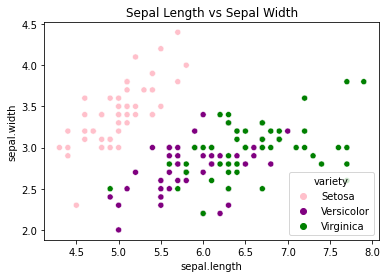

In [5]:
#scatterplot of sepal length vs sepal width
#This scatterplot shows that sepal length vs sepal width only separates Setosa and versicolor and virginica
#Does not separate all threee

colors_dict_one=dict({'Setosa':'pink','Versicolor':'purple','Virginica':'green'})
sns.scatterplot(data=iris, x="sepal.length", y="sepal.width",hue='variety',palette=colors_dict_one).set(title='Sepal Length vs Sepal Width')

[Text(0.5, 1.0, 'Sepal Length vs Petal Length')]

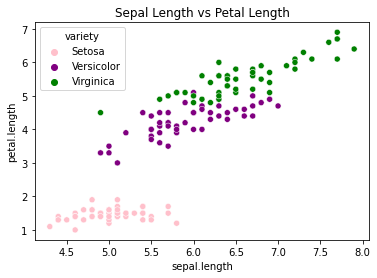

In [6]:
#Sepal length vs petal length is able to cluster all three categories well
sns.scatterplot(data=iris, x="sepal.length", y="petal.length",hue='variety',palette=colors_dict_one).set(title='Sepal Length vs Petal Length')

[Text(0.5, 1.0, 'Sepal Length vs Petal Width')]

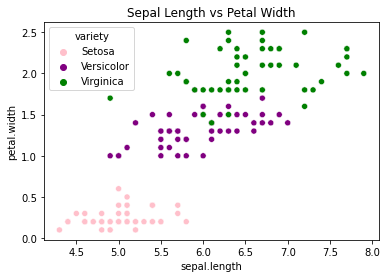

In [7]:
#Sepal Length vs Sepal with is able to further separate the three classes.
#Some Ambiguity between versicolor and virginica
sns.scatterplot(data=iris, x="sepal.length", y="petal.width",hue='variety',palette=colors_dict_one).set(title='Sepal Length vs Petal Width')

[Text(0.5, 1.0, 'Sepal Width vs Petal Width')]

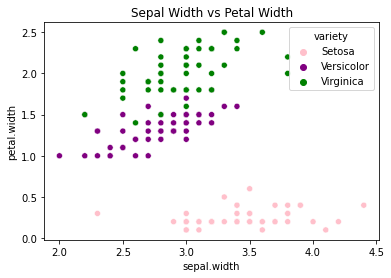

In [8]:
#Sepal Width vs Petal Width is able to split the three categories.
#Some AMbiguity between Versicolor and Virginica
sns.scatterplot(data=iris, x="sepal.width", y="petal.width",hue='variety',palette=colors_dict_one).set(title='Sepal Width vs Petal Width')

## Choose Subsets: Linearly Separable features
It seems that setosa and Virginca are two subsets that tend to be clustered far away from eachother. Using these two classes of iris and Sepal Length vs petal length, I will begin to build a perceptron model with these two linearly separable classes. 

In [9]:
#Select Subset of iris dataframe, exclude rows where variety=versicolor
#Create a bool variable that we use to then filter out rows where varitey is versicolor
versicolor_bool=iris['variety']!='Versicolor'
subset_iris=iris[versicolor_bool]
print(subset_iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[100 rows x 5 columns]


In [25]:
#Since the perceptron only intakes binary values, replace variety name with 0 or 1
#Let Setosa=0
#Let Virginica=1
subset_iris = subset_iris.replace(['Setosa'],0)
subset_iris = subset_iris.replace(['Virginica'],1)
subset_iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Linearly Separable Features: Perceptron Model 
Here, the perceptron model is implemented with 2, 3 and 4 features

In [12]:
#Split the data into train and test, and scale data. Will use 0.2 as test and 0.8 as train (80% of data used to train)

In [44]:
X1=subset_iris.drop(columns=['sepal.width','petal.width','variety'],axis=1) #Two linearly separable features
X1b=subset_iris.drop(columns=['petal.length','petal.width','variety'],axis=1) #Two non-linearly separable features
X2=subset_iris.drop(columns=['petal.width','variety']) #Three features
X3=subset_iris.drop(columns=['variety']) #Four features
y=subset_iris['variety']

X_train, X_test, y_train, y_test=train_test_split(X1, y, test_size=0.20)

In [39]:
model_perceptron = Perceptron()

In [40]:
model_perceptron.fit(X_train, y_train)

Perceptron()

In [41]:
predictions_2vars=model_perceptron.predict(X_test)

In [43]:
#Both sepal length and petal length are linearly separable so it makes sense that the model is able to predict variety with 100% accuracy.

In [42]:
print(classification_report(y_test,predictions_2vars))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# Try again with two non-linearly separable variables

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X1b, y, test_size=0.20)

In [49]:
model_perceptron = Perceptron()

In [50]:
model_perceptron.fit(X_train, y_train)

Perceptron()

In [51]:
predictions_2vars_nonsep=model_perceptron.predict(X_test)

In [ ]:
#Two non-linearly separable features makes prediction accuracy drop to 95%

In [52]:
print(classification_report(y_test,predictions_2vars_nonsep))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      1.00      0.96        12

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
#Training model with three features, it is able to predict variety to 100% accuracy

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X2, y, test_size=0.20)
model_perceptron = Perceptron()
model_perceptron.fit(X_train, y_train)
predictions_3vars=model_perceptron.predict(X_test)
print(classification_report(y_test,predictions_3vars))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
#Training model with all four features, it is able to predict variety to 100% accuracy

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X3, y, test_size=0.20)
model_perceptron = Perceptron()
model_perceptron.fit(X_train, y_train)
predictions_4vars=model_perceptron.predict(X_test)
print(classification_report(y_test,predictions_4vars))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Linearly Separable Features: Adaline Model 
Here, the perceptron adaline model is implemented with 2, 3 and 4 features. With an adaline model the weights are updated based on the linear activation function. In order to implement the Adaline model, the adaline batch gradient descent algorithm that is used below was obtained from: https://nthu-datalab.github.io/ml/labs/04-1_Perceptron_Adaline/04-1_Perceptron_Adaline.html

Two linearly separable features: sepal length petal length
Two non-linearly separable features: sepal length and sepal width

In [56]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        The seed of the pseudo random number generator.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            
            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [ ]:
# Training Adaline model with four features

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X3, y, test_size=0.20)
model_adaline = AdalineGD()
model_adaline.fit(X_train, y_train)
predictions_ada_4vars=model_adaline.predict(X_test)
print(classification_report(y_test,predictions_4vars))

              precision    recall  f1-score   support

           0       0.33      0.17      0.22        12
           1       0.29      0.50      0.36         8

    accuracy                           0.30        20
   macro avg       0.31      0.33      0.29        20
weighted avg       0.31      0.30      0.28        20



In [ ]:
#Training Adaline model with three features

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X2, y, test_size=0.20)
model_adaline = AdalineGD()
model_adaline.fit(X_train, y_train)
predictions_ada_3vars=model_adaline.predict(X_test)
print(classification_report(y_test,predictions_3vars))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20



In [ ]:
#Training Adaline model with two non linearly separable features

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X1b, y, test_size=0.20)
model_adaline = AdalineGD()
model_adaline.fit(X_train, y_train)
predictions_ada_nonlinear2=model_adaline.predict(X_test)
print(classification_report(y_test,predictions_ada_nonlinear2))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00      13.0
           1       0.00      0.00      0.00       7.0

    accuracy                           0.00      20.0
   macro avg       0.00      0.00      0.00      20.0
weighted avg       0.00      0.00      0.00      20.0



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Training Adaline model with two linearly separable features

In [63]:
X_train, X_test, y_train, y_test=train_test_split(X1, y, test_size=0.20)
model_adaline = AdalineGD()
model_adaline.fit(X_train, y_train)
predictions_ada_linear2=model_adaline.predict(X_test)
print(classification_report(y_test,predictions_ada_linear2))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00       6.0
           1       0.00      0.00      0.00      14.0

    accuracy                           0.00      20.0
   macro avg       0.00      0.00      0.00      20.0
weighted avg       0.00      0.00      0.00      20.0



/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
